In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DEEP LEARNING/Crop_recommendation.csv'
soil_data = pd.read_csv(file_path)

soil_data.head(), soil_data.columns

(    N   P   K  temperature   humidity        ph    rainfall label
 0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
 1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
 2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
 3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
 4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice,
 Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object'))

**DATA SPLITTING AND SCALING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = soil_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = soil_data['label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, len(set(y_encoded))


((1760, 7), (440, 7), 22)

In [ ]:
!pip install tensorflow

**ANN MODEL**

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann_model = Sequential([
    Dense(128, input_dim=7, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(22, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_ann = ann_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

ann_test_loss, ann_test_acc = ann_model.evaluate(X_test_scaled, y_test)

ann_test_loss, ann_test_acc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2322 - loss: 2.8446 - val_accuracy: 0.4864 - val_loss: 2.0142
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5411 - loss: 1.6654 - val_accuracy: 0.8045 - val_loss: 0.8264
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8734 - loss: 0.6469 - val_accuracy: 0.8977 - val_loss: 0.4014
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9289 - loss: 0.3152 - val_accuracy: 0.9432 - val_loss: 0.2611
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9542 - loss: 0.2089 - val_accuracy: 0.9386 - val_loss: 0.2146
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9489 - loss: 0.1720 - val_accuracy: 0.9500 - val_loss: 0.1789
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9609 - loss: 0.1264 - val_accuracy: 0.9432 - val_loss: 0.1700
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9674 - loss: 0.1122 - val_accuracy: 0.9455 - val_loss

(0.1189347431063652, 0.9659090638160706)

In [ ]:
print("ANN Test Loss:", ann_test_loss)
print("ANN Test Accuracy:", ann_test_acc)

ANN Test Loss: 0.1189347431063652
ANN Test Accuracy: 0.9659090638160706


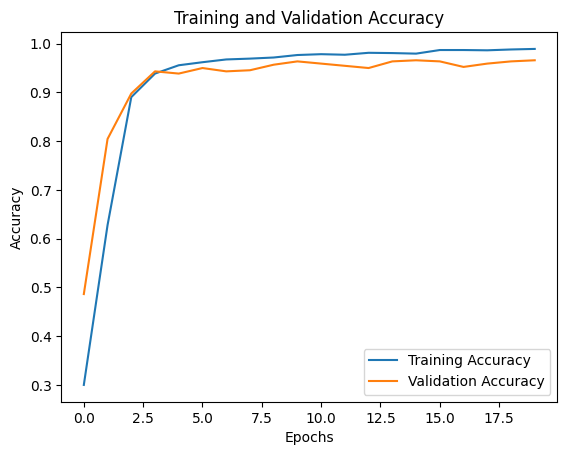

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_ann.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


**MULTILAYER PERCEPTRON MODEL**

In [ ]:
mlp_model = Sequential([
    Dense(128, input_dim=7, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(22, activation='softmax')
])

mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_mlp = mlp_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test_scaled, y_test)

mlp_test_loss, mlp_test_acc


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2270 - loss: 2.8720 - val_accuracy: 0.5545 - val_loss: 1.7841
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7056 - loss: 1.3353 - val_accuracy: 0.8568 - val_loss: 0.5795
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9132 - loss: 0.4425 - val_accuracy: 0.9000 - val_loss: 0.3302
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9446 - loss: 0.2527 - val_accuracy: 0.9227 - val_loss: 0.2571
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9536 - loss: 0.1893 - val_accuracy: 0.9545 - val_loss: 0.1816
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9572 - loss: 0.1538 - val_accuracy: 0.9477 - val_loss: 0.1777
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9691 - loss: 0.1160 - val_accuracy: 0.9432 - val_loss: 0.1618
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9729 - loss: 0.0934 - val_accuracy: 0.9545 - val_loss:

(0.09449473023414612, 0.9590908885002136)

In [ ]:
print("MLP Test Loss:", mlp_test_loss)
print("MLP Test Accuracy:", mlp_test_acc)

MLP Test Loss: 0.09449473023414612
MLP Test Accuracy: 0.9590908885002136


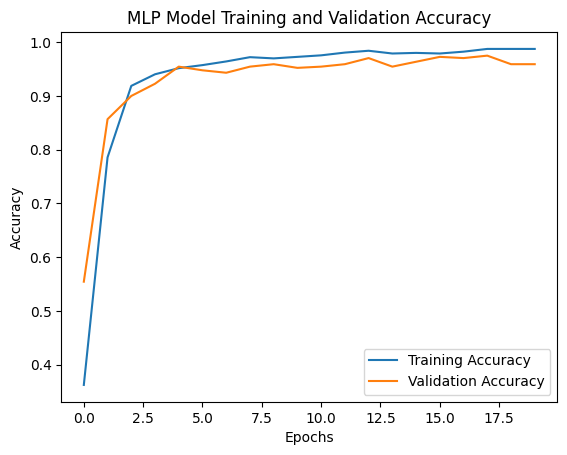

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MLP Model Training and Validation Accuracy')
plt.legend()
plt.show()


**CNN MODEL**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(7, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(22, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test)

cnn_test_loss, cnn_test_acc


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1390 - loss: 2.9197 - val_accuracy: 0.4000 - val_loss: 2.2535
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5674 - loss: 1.9435 - val_accuracy: 0.7432 - val_loss: 1.1543
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8201 - loss: 0.9161 - val_accuracy: 0.8477 - val_loss: 0.6147
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8944 - loss: 0.4950 - val_accuracy: 0.8795 - val_loss: 0.4333
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9296 - loss: 0.3378 - val_accuracy: 0.8864 - val_loss: 0.3417
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9516 - loss: 0.2503 - val_accuracy: 0.9114 - val_loss: 0.2852
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9360 - loss: 0.2163 - val_accuracy: 0.9136 - val_loss: 0.2544
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9606 - loss: 0.1710 - val_accuracy: 0.9227 - val_loss: 0.2189
Epo

(0.1215190440416336, 0.9522727131843567)

In [ ]:
print("CNN Test Loss:", cnn_test_loss)
print("CNN Test Accuracy:", cnn_test_acc)

CNN Test Loss: 0.1215190440416336
CNN Test Accuracy: 0.9522727131843567


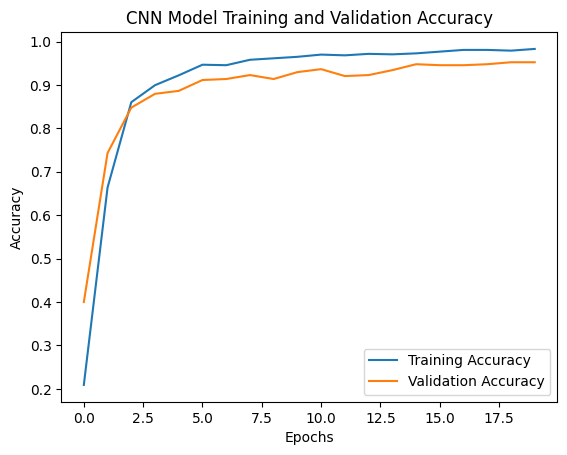

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model Training and Validation Accuracy')
plt.legend()
plt.show()


**LSTM MODEL**

In [ ]:
from tensorflow.keras.layers import LSTM

X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

lstm_model = Sequential([
    LSTM(128, input_shape=(1, 7), activation='relu'),
    Dense(64, activation='relu'),
    Dense(22, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test_lstm, y_test)

lstm_test_loss, lstm_test_acc


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1886 - loss: 3.0382 - val_accuracy: 0.4341 - val_loss: 2.7177
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5157 - loss: 2.4371 - val_accuracy: 0.6614 - val_loss: 1.4872
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7444 - loss: 1.1691 - val_accuracy: 0.8318 - val_loss: 0.6808
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8980 - loss: 0.5343 - val_accuracy: 0.8955 - val_loss: 0.4094
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9156 - loss: 0.3401 - val_accuracy: 0.9318 - val_loss: 0.2919
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9549 - loss: 0.2356 - val_accuracy: 0.9227 - val_loss: 0.2476
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9555 - loss: 0.1816 - val_accuracy: 0.9386 - val_loss: 0.2054
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9584 - loss: 0.1451 - val_accuracy: 0.9455 - val_loss: 0.1826
Epo

(0.10105850547552109, 0.9704545736312866)

In [ ]:
print("LSTM Test Loss:", lstm_test_loss)
print("LSTM Test Accuracy:", lstm_test_acc)

LSTM Test Loss: 0.10105850547552109
LSTM Test Accuracy: 0.9704545736312866


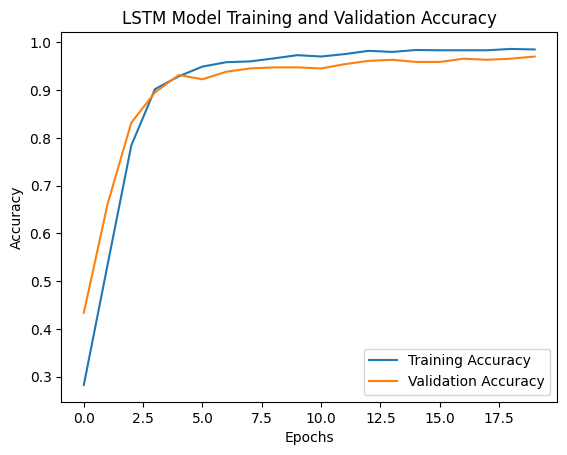

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Training and Validation Accuracy')
plt.legend()
plt.show()


**GRADIENT BOOSTED DECISION TREES (GBDT) MODEL**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

xgb_accuracy


0.9863636363636363

In [ ]:
print("XGBoost Test Accuracy:",xgb_accuracy)

XGBoost Test Accuracy: 0.9863636363636363


**BASED ON ACCURACY, THE LSTM MODEL IS PREDICTED TO PERFORM BETTER ON ALL THE DEEP LEARNING ALGORITHMS PERFORM BETTER**